In [1]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [3]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [2]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [27]:
tokens = tokenizer.encode('Best!', return_tensors = 'pt')

In [28]:
result = model(tokens)

In [29]:
result.logits

tensor([[-2.4204, -2.3980, -0.5809,  1.4982,  3.3362]],
       grad_fn=<AddmmBackward0>)

In [30]:
int(torch.argmax(result.logits))+1

5

In [16]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors = 'pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv(r'C:\Users\asus\Downloads\df (1).csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(100, 8)
(100, 8)


In [21]:
df

,S.No,Name,Profile url,Review,Review url,Detailed Review,Stay Date,Rating
0,0,Susan S,https://www.tripadvisor.in//Profile/310SusanS,"Historic, luxury hotel - a destination in itself",https://www.tripadvisor.in//ShowUserReviews-g3...,This hotel is simply amazing. Incredibly luxur...,Jul-22,5
1,1,Globinious,https://www.tripadvisor.in//Profile/Globinious,Excellent Hotel - Poorly managed,https://www.tripadvisor.in//ShowUserReviews-g3...,"This is a landmark historic hotel, in an exce...",Jun-22,3
2,2,DIL KHAN,https://www.tripadvisor.in//Profile/DILKHAN123,A True Example Of Exceptional Hospitality,https://www.tripadvisor.in//ShowUserReviews-g3...,From where to began… ok this is my 4 th or 5 t...,May-22,5
3,3,Rishabh M,https://www.tripadvisor.in//Profile/520rishabhm,Disappointing service,https://www.tripadvisor.in//ShowUserReviews-g3...,"The hotel is stuck in time, and not in a good ...",Apr-22,3
4,4,Nupur Ghosh,https://www.tripadvisor.in//Profile/Karmamoksha19,Highly recommended,https://www.tripadvisor.in//ShowUserReviews-g3...,We booked Imperial hotel Delhi for one of our ...,Jun-22,5
...,...,...,...,...,...,...,...,...
95,95,Raj,https://www.tripadvisor.in//Profile/nraj37434,Experience,https://www.tripadvisor.in//ShowUserReviews-g3...,Warm hospitality from each and every member ma...,Jan-22,5
96,96,Jatin singh,https://www.tripadvisor.in//Profile/Jatin_4944,Leisure,https://www.tripadvisor.in//ShowUserReviews-g3...,It’s been awhile I was waiting to write a revi...,Jan-22,5
97,97,Alpana Arha,https://www.tripadvisor.in//Profile/ALPANA-AB-...,Awesome Place to stay,https://www.tripadvisor.in//ShowUserReviews-g3...,Really nice Hotel... Excellent facilities. Sta...,Nov-21,5
98,98,curious_traveler_10,https://www.tripadvisor.in//Profile/curious_tr...,Basement Living,https://www.tripadvisor.in//ShowUserReviews-g3...,"Our rooms, one Heritage and other Grand Herita...",Dec-21,2


In [22]:
df['sentiment'] = df['Detailed Review'].apply(lambda x: sentiment_score(x[:512]))

In [23]:
df

,S.No,Name,Profile url,Review,Review url,Detailed Review,Stay Date,Rating,sentiment
0,0,Susan S,https://www.tripadvisor.in//Profile/310SusanS,"Historic, luxury hotel - a destination in itself",https://www.tripadvisor.in//ShowUserReviews-g3...,This hotel is simply amazing. Incredibly luxur...,Jul-22,5,5
1,1,Globinious,https://www.tripadvisor.in//Profile/Globinious,Excellent Hotel - Poorly managed,https://www.tripadvisor.in//ShowUserReviews-g3...,"This is a landmark historic hotel, in an exce...",Jun-22,3,2
2,2,DIL KHAN,https://www.tripadvisor.in//Profile/DILKHAN123,A True Example Of Exceptional Hospitality,https://www.tripadvisor.in//ShowUserReviews-g3...,From where to began… ok this is my 4 th or 5 t...,May-22,5,4
3,3,Rishabh M,https://www.tripadvisor.in//Profile/520rishabhm,Disappointing service,https://www.tripadvisor.in//ShowUserReviews-g3...,"The hotel is stuck in time, and not in a good ...",Apr-22,3,2
4,4,Nupur Ghosh,https://www.tripadvisor.in//Profile/Karmamoksha19,Highly recommended,https://www.tripadvisor.in//ShowUserReviews-g3...,We booked Imperial hotel Delhi for one of our ...,Jun-22,5,4
...,...,...,...,...,...,...,...,...,...
95,95,Raj,https://www.tripadvisor.in//Profile/nraj37434,Experience,https://www.tripadvisor.in//ShowUserReviews-g3...,Warm hospitality from each and every member ma...,Jan-22,5,5
96,96,Jatin singh,https://www.tripadvisor.in//Profile/Jatin_4944,Leisure,https://www.tripadvisor.in//ShowUserReviews-g3...,It’s been awhile I was waiting to write a revi...,Jan-22,5,5
97,97,Alpana Arha,https://www.tripadvisor.in//Profile/ALPANA-AB-...,Awesome Place to stay,https://www.tripadvisor.in//ShowUserReviews-g3...,Really nice Hotel... Excellent facilities. Sta...,Nov-21,5,5
98,98,curious_traveler_10,https://www.tripadvisor.in//Profile/curious_tr...,Basement Living,https://www.tripadvisor.in//ShowUserReviews-g3...,"Our rooms, one Heritage and other Grand Herita...",Dec-21,2,2


In [24]:
import re

def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]','',text)  # Removed @ mentions
    text=re.sub(r'#','',text)             # Removing '#' symbole
    text=re.sub(r'RT[\s]+','', text)      # Removing RT
    text=re.sub(r'https?:\/\/S+','',text) # Removing the Hyperlink
    return text

In [25]:
df['Detailed Review']=df['Detailed Review'].apply(cleanTxt)
df['Detailed Review']

0     This hotel is simply amazing. Incredibly luxur...
1     This is a landmark historic hotel,  in an exce...
2     From where to began… ok this is my 4 th or 5 t...
3     The hotel is stuck in time, and not in a good ...
4     We booked Imperial hotel Delhi for one of our ...
                            ...                        
95    Warm hospitality from each and every member ma...
96    It’s been awhile I was waiting to write a revi...
97    Really nice Hotel... Excellent facilities. Sta...
98    Our rooms, one Heritage and other Grand Herita...
99    Best place I have visited in delhi.... What a ...
Name: Detailed Review, Length: 100, dtype: object

In [26]:
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
import string
sentence=df['Detailed Review'].to_string()
sentence

"0     This hotel is simply amazing. Incredibly luxur...\n1     This is a landmark historic hotel,  in an exce...\n2     From where to began… ok this is my 4 th or 5 t...\n3     The hotel is stuck in time, and not in a good ...\n4     We booked Imperial hotel Delhi for one of our ...\n5     Amazing place that we really appreciated. Clea...\n6     This is one of the most Luxurious and Elegent ...\n7     Imperial has a wonderful spa. Athei and Thung ...\n8     The services provided were awesome.it was a Ni...\n9     Best and hassle free deal. Courteous and fried...\n10    Excellent stay and services! The staff is very...\n11    All staff were very courteous & Kevin was a st...\n12    The sauna was peaceful and mind relaxing Loved...\n13    If you’re looking for an amazing place to stay...\n14    I would like to share, that both me and my par...\n15    The hotel was just amazing. Loved everything t...\n16    Incredibly helpful with warmth and genuine kin...\n17    TripAdvisor is the App w

In [28]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# creates tokens, creates lower class, removes numbers and lemmatizes the words
new_tokens = word_tokenize(sentence)
new_tokens = [t.lower() for t in new_tokens]
new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
lemmatizer = WordNetLemmatizer()
new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
#counts the words, pairs and trigrams

counted = Counter(new_tokens)
counted_2= Counter(ngrams(new_tokens,2))
counted_3= Counter(ngrams(new_tokens,3))
counted_3

Counter({('0', 'hotel', 'simply'): 1,
         ('hotel', 'simply', 'amazing'): 1,
         ('simply', 'amazing', '.'): 1,
         ('amazing', '.', 'incredibly'): 1,
         ('.', 'incredibly', 'luxur'): 1,
         ('incredibly', 'luxur', '...'): 1,
         ('luxur', '...', '1'): 1,
         ('...', '1', 'landmark'): 1,
         ('1', 'landmark', 'historic'): 1,
         ('landmark', 'historic', 'hotel'): 1,
         ('historic', 'hotel', ','): 1,
         ('hotel', ',', 'exce'): 1,
         (',', 'exce', '...'): 1,
         ('exce', '...', '2'): 1,
         ('...', '2', 'began…'): 1,
         ('2', 'began…', 'ok'): 1,
         ('began…', 'ok', '4'): 1,
         ('ok', '4', 'th'): 1,
         ('4', 'th', '5'): 1,
         ('th', '5', '...'): 1,
         ('5', '...', '3'): 1,
         ('...', '3', 'hotel'): 1,
         ('3', 'hotel', 'stuck'): 1,
         ('hotel', 'stuck', 'time'): 1,
         ('stuck', 'time', ','): 1,
         ('time', ',', 'good'): 1,
         (',', 'good', '...'

In [30]:
#creates 3 data frames and returns thems
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)

In [31]:
! pip install wordcloud

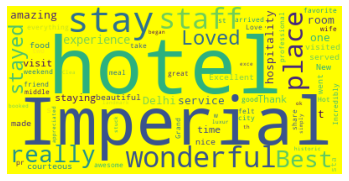

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_words = 70, background_color = 'yellow').generate((sentence))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

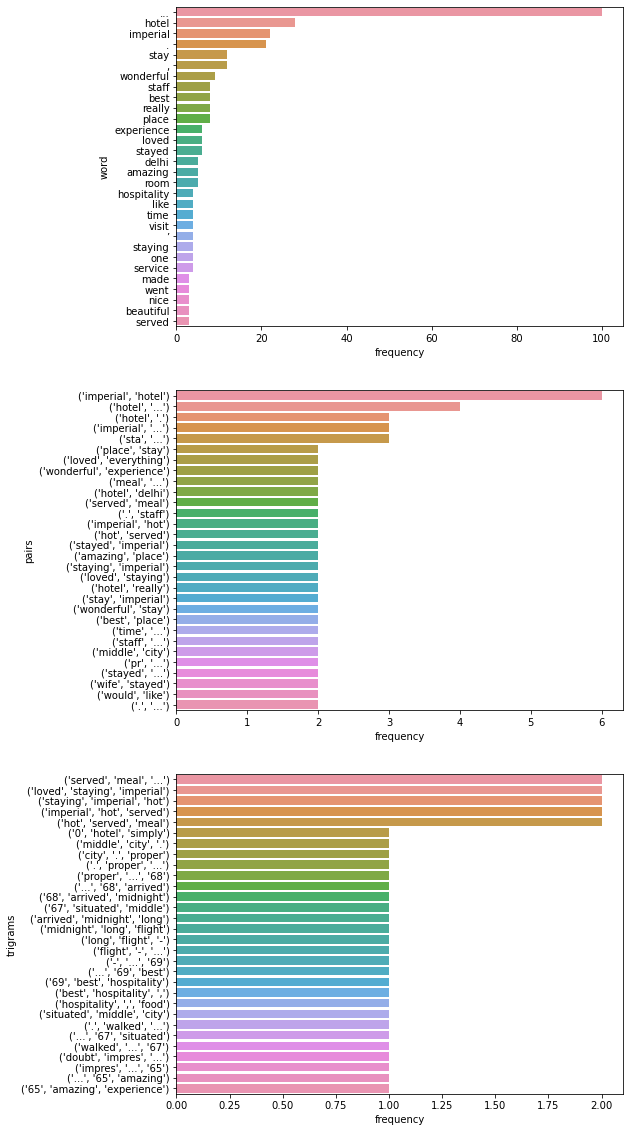

In [33]:
# create subplot of the different data frames and draw graphs

fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30))

In [34]:
!pip install TextBlob

In [35]:
from textblob import TextBlob

# Preparing an input sentence

sentence = 'I am  happy with product, Please throw it'
analysisPol = TextBlob(sentence).polarity  # Polarity ranges from -1 to +1. 
# -1==Negative sentiment  0= neutral sentiment  +1=Positive sentiment
analysisSub = TextBlob(sentence).subjectivity  # 0 (subjectivity) to 1(no subjectivity)

print(analysisPol)
print(analysisSub)

0.8
1.0


In [36]:
# Create a function to calculate the subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [38]:
#Create two new columns ‘Subjectivity’ & ‘Polarity’

df['TextBlob_Subjectivity']=df['Detailed Review'].apply(getSubjectivity)
df['TextBlob_Polarity']=df['Detailed Review'].apply(getPolarity)
df

,S.No,Name,Profile url,Review,Review url,Detailed Review,Stay Date,Rating,sentiment,TextBlob_Subjectivity,TextBlob_Polarity
0,0,Susan S,https://www.tripadvisor.in//Profile/310SusanS,"Historic, luxury hotel - a destination in itself",https://www.tripadvisor.in//ShowUserReviews-g3...,This hotel is simply amazing. Incredibly luxur...,Jul-22,5,5,0.596224,0.360153
1,1,Globinious,https://www.tripadvisor.in//Profile/Globinious,Excellent Hotel - Poorly managed,https://www.tripadvisor.in//ShowUserReviews-g3...,"This is a landmark historic hotel, in an exce...",Jun-22,3,2,0.482782,0.167865
2,2,DIL KHAN,https://www.tripadvisor.in//Profile/DILKHAN123,A True Example Of Exceptional Hospitality,https://www.tripadvisor.in//ShowUserReviews-g3...,From where to began… ok this is my 4 th or 5 t...,May-22,5,4,0.558098,0.432019
3,3,Rishabh M,https://www.tripadvisor.in//Profile/520rishabhm,Disappointing service,https://www.tripadvisor.in//ShowUserReviews-g3...,"The hotel is stuck in time, and not in a good ...",Apr-22,3,2,0.450000,0.125000
4,4,Nupur Ghosh,https://www.tripadvisor.in//Profile/Karmamoksha19,Highly recommended,https://www.tripadvisor.in//ShowUserReviews-g3...,We booked Imperial hotel Delhi for one of our ...,Jun-22,5,4,0.625966,0.213199
...,...,...,...,...,...,...,...,...,...,...,...
95,95,Raj,https://www.tripadvisor.in//Profile/nraj37434,Experience,https://www.tripadvisor.in//ShowUserReviews-g3...,Warm hospitality from each and every member ma...,Jan-22,5,5,0.757778,0.640000
96,96,Jatin singh,https://www.tripadvisor.in//Profile/Jatin_4944,Leisure,https://www.tripadvisor.in//ShowUserReviews-g3...,It’s been awhile I was waiting to write a revi...,Jan-22,5,5,0.650198,0.327321
97,97,Alpana Arha,https://www.tripadvisor.in//Profile/ALPANA-AB-...,Awesome Place to stay,https://www.tripadvisor.in//ShowUserReviews-g3...,Really nice Hotel... Excellent facilities. Sta...,Nov-21,5,5,0.776667,0.531458
98,98,curious_traveler_10,https://www.tripadvisor.in//Profile/curious_tr...,Basement Living,https://www.tripadvisor.in//ShowUserReviews-g3...,"Our rooms, one Heritage and other Grand Herita...",Dec-21,2,2,0.539286,0.177381


In [39]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [40]:
df ['Sentiment'] = df['TextBlob_Polarity'].apply(getAnalysis )

df

,S.No,Name,Profile url,Review,Review url,Detailed Review,Stay Date,Rating,sentiment,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,Susan S,https://www.tripadvisor.in//Profile/310SusanS,"Historic, luxury hotel - a destination in itself",https://www.tripadvisor.in//ShowUserReviews-g3...,This hotel is simply amazing. Incredibly luxur...,Jul-22,5,5,0.596224,0.360153,Positive
1,1,Globinious,https://www.tripadvisor.in//Profile/Globinious,Excellent Hotel - Poorly managed,https://www.tripadvisor.in//ShowUserReviews-g3...,"This is a landmark historic hotel, in an exce...",Jun-22,3,2,0.482782,0.167865,Positive
2,2,DIL KHAN,https://www.tripadvisor.in//Profile/DILKHAN123,A True Example Of Exceptional Hospitality,https://www.tripadvisor.in//ShowUserReviews-g3...,From where to began… ok this is my 4 th or 5 t...,May-22,5,4,0.558098,0.432019,Positive
3,3,Rishabh M,https://www.tripadvisor.in//Profile/520rishabhm,Disappointing service,https://www.tripadvisor.in//ShowUserReviews-g3...,"The hotel is stuck in time, and not in a good ...",Apr-22,3,2,0.450000,0.125000,Positive
4,4,Nupur Ghosh,https://www.tripadvisor.in//Profile/Karmamoksha19,Highly recommended,https://www.tripadvisor.in//ShowUserReviews-g3...,We booked Imperial hotel Delhi for one of our ...,Jun-22,5,4,0.625966,0.213199,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Raj,https://www.tripadvisor.in//Profile/nraj37434,Experience,https://www.tripadvisor.in//ShowUserReviews-g3...,Warm hospitality from each and every member ma...,Jan-22,5,5,0.757778,0.640000,Positive
96,96,Jatin singh,https://www.tripadvisor.in//Profile/Jatin_4944,Leisure,https://www.tripadvisor.in//ShowUserReviews-g3...,It’s been awhile I was waiting to write a revi...,Jan-22,5,5,0.650198,0.327321,Positive
97,97,Alpana Arha,https://www.tripadvisor.in//Profile/ALPANA-AB-...,Awesome Place to stay,https://www.tripadvisor.in//ShowUserReviews-g3...,Really nice Hotel... Excellent facilities. Sta...,Nov-21,5,5,0.776667,0.531458,Positive
98,98,curious_traveler_10,https://www.tripadvisor.in//Profile/curious_tr...,Basement Living,https://www.tripadvisor.in//ShowUserReviews-g3...,"Our rooms, one Heritage and other Grand Herita...",Dec-21,2,2,0.539286,0.177381,Positive


In [41]:
df['Sentiment'] .value_counts()

Positive    98
Negative     1
Neutral      1
Name: Sentiment, dtype: int64

Positive    0.98
Negative    0.01
Neutral     0.01
Name: Sentiment, dtype: float64

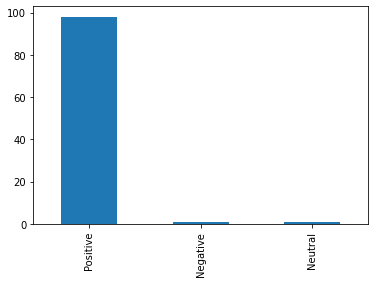

In [42]:
# Bar plot of tweets based on sentiment score or polarity
df ['Sentiment'] .value_counts().plot(kind='bar')
df ['Sentiment'] .value_counts()/df ['Sentiment'] .value_counts().sum()